In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [21]:
plt.rcParams['figure.figsize'] = [10, 6]

In [22]:
df = pd.read_csv("train_set.csv",  parse_dates=['Date'])
df

,Unit,Family,PLID,Quarter,Month,Quantity,Date
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,2016-01-08
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,2016-01-10
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,2016-01-09
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,2017-01-08
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,2017-01-10
...,...,...,...,...,...,...,...
10857,RTOBU,C980040,C9800-40-K9,Q4 FY2011,JUN FY2011,229,2020-01-06
10858,RTOBU,C980040,C9800-40-K9,Q4 FY2011,MAY FY2011,289,2020-01-05
10859,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUL FY2012,1231,2021-01-07
10860,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUN FY2012,591,2021-01-06


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10862 entries, 0 to 10861
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Unit      10862 non-null  object        
 1   Family    10862 non-null  object        
 2   PLID      10862 non-null  object        
 3   Quarter   10862 non-null  object        
 4   Month     10862 non-null  object        
 5   Quantity  10862 non-null  int64         
 6   Date      10862 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 594.1+ KB


In [29]:
df_old = pd.read_csv("train_set.csv",  parse_dates=['Date'])
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10862 entries, 0 to 10861
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Unit      10862 non-null  object        
 1   Family    10862 non-null  object        
 2   PLID      10862 non-null  object        
 3   Quarter   10862 non-null  object        
 4   Month     10862 non-null  object        
 5   Quantity  10862 non-null  int64         
 6   Date      10862 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 594.1+ KB


In [33]:
df_old["Quarter"].sort_values(ascending=False)

10338    Q4 FY2015
10431    Q4 FY2015
4448     Q4 FY2015
4447     Q4 FY2015
4446     Q4 FY2015
           ...    
7546     Q1 FY2002
7547     Q1 FY2002
7548     Q1 FY2002
5699     Q1 FY2002
4676     Q1 FY2002
Name: Quarter, Length: 10862, dtype: object

In [34]:
df_old[df_old["Quarter"]=="Q4 FY2022"]

,Unit,Family,PLID,Quarter,Month,Quantity,Date


In [24]:
validation_set = pd.read_csv("validation_set.csv",  parse_dates=['Date'])
validation_set["Date"] = pd.to_datetime(validation_set["Date"])
validation_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Unit      0 non-null      object        
 1   Family    0 non-null      object        
 2   PLID      0 non-null      object        
 3   Quarter   0 non-null      object        
 4   Month     0 non-null      object        
 5   Quantity  0 non-null      object        
 6   Date      0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 0.0+ bytes


In [25]:
df["PLID"].nunique()

250

In [26]:
df[(df["PLID"] == "CBR-D121-DS-MOD")&(df["Quarter"]=="Q1 FY2022")]

,Unit,Family,PLID,Quarter,Month,Quantity,Date
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,2016-01-08
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,2016-01-10
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,2016-01-09
18,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,641,2022-01-08
19,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,530,2022-01-10
20,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,291,2022-01-09


<AxesSubplot: ylabel='Count'>

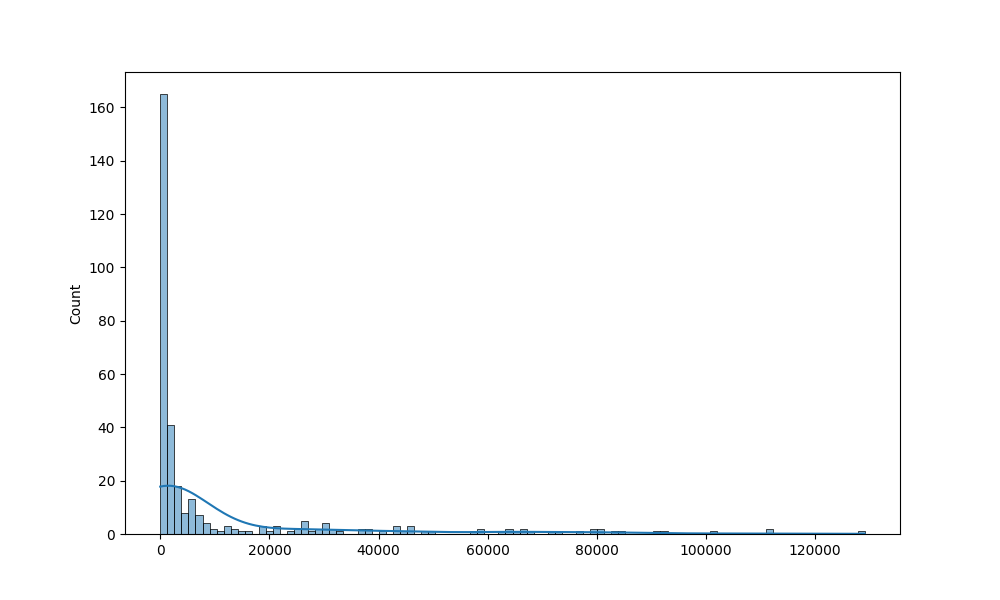

In [27]:
%matplotlib widget
sns.histplot(df[df["Date"].dt.year==2016]["Quantity"].values, kde=True, bins=100)

Data bakwas hai!

In [28]:
"Q1 FY2022"[-4:]

'2022'

In [11]:
df["Year"] = df["Quarter"].apply(lambda x: int(x[-4:]))
validation_set["Year"] = validation_set["Quarter"].apply(lambda x: int(x[-4:]))

<AxesSubplot: xlabel='Year', ylabel='Quantity'>

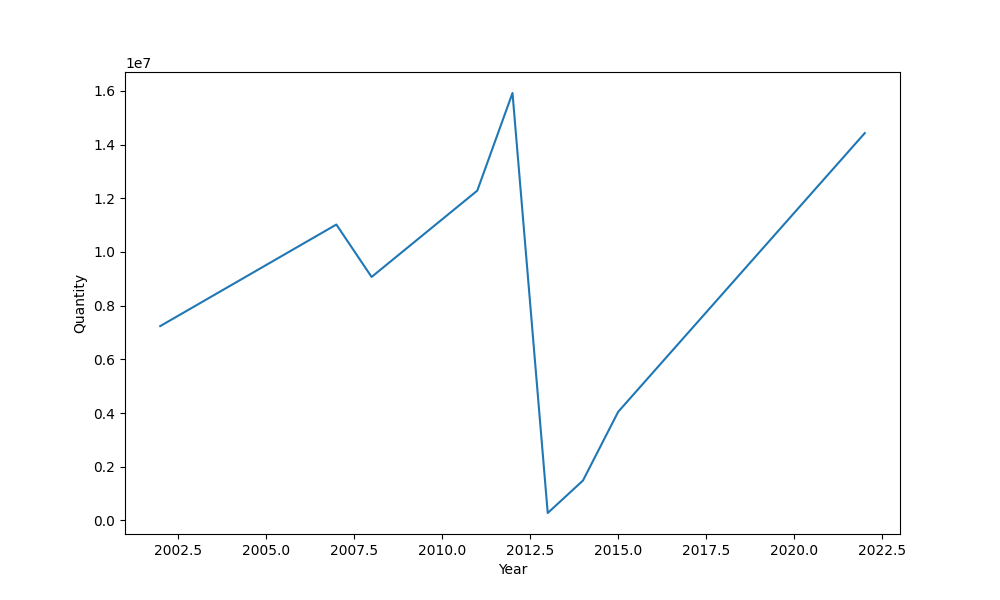

In [12]:
%matplotlib widget
sns.lineplot(data=df.groupby("Year").sum(numeric_only=True), x="Year", y="Quantity")

In [13]:
df["Family"].nunique()

73

In [14]:
df.head()

,Unit,Family,PLID,Quarter,Month,Quantity,Date,Year
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,2016-01-08,2022
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,2016-01-10,2022
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,2016-01-09,2022
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,2017-01-08,2002
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,2017-01-10,2002


In [15]:
df["Booking_Month"] = df["Date"].dt.month
df["Booking_Year"] = df["Date"].dt.year
df["Quarter"] = df["Quarter"].apply(lambda x: x[:2])
df["Month"] = df["Month"].apply(lambda x: x.split(" ")[0])

validation_set["Booking_Month"] = validation_set["Date"].dt.month
validation_set["Booking_Year"] = validation_set["Date"].dt.year
validation_set["Quarter"] = validation_set["Quarter"].apply(lambda x: x[:2])
validation_set["Month"] = validation_set["Month"].apply(lambda x: x.split(" ")[0])

In [16]:
df.columns

Index(['Unit', 'Family', 'PLID', 'Quarter', 'Month', 'Quantity', 'Date',
       'Year', 'Booking_Month', 'Booking_Year'],
      dtype='object')

In [17]:
df.drop(columns=["PLID", "Family", "Date"], inplace=True)
validation_set.drop(columns=["PLID", "Family", "Date"], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10862 entries, 0 to 10861
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unit           10862 non-null  object
 1   Quarter        10862 non-null  object
 2   Month          10862 non-null  object
 3   Quantity       10862 non-null  int64 
 4   Year           10862 non-null  int64 
 5   Booking_Month  10862 non-null  int64 
 6   Booking_Year   10862 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 594.1+ KB


In [19]:
df.to_csv("train_set_final.csv", index=False)
validation_set.to_csv("validation_set_final.csv", index=False)